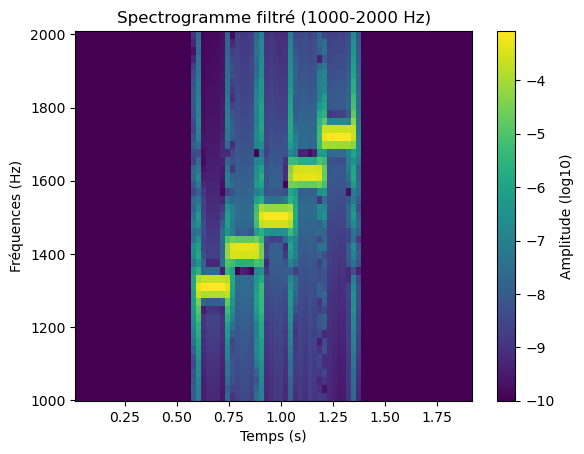

In [126]:
from scipy.signal import spectrogram
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

# Chargement des fichiers de référence
Fs, reference_hyper = wavfile.read('alarms/hyper.wav')
Fs, reference_hypo = wavfile.read('alarms/hypo.wav')

def convert_to_mono(s):
    if len(s.shape) == 2:  
        s = s.mean(axis=1) 
    return s

def filter_signal(s, Wn1, Wn2, type, Fs):
    Wn = [Wn1 / (Fs / 2), Wn2 / (Fs / 2)] 
    b, a = signal.butter(1, Wn, type) 
    s = signal.filtfilt(b, a, s)
    return s

def apply_filter(Fs, s):
    s = filter_signal(s, 1311, 1723, 'band', Fs)
    s = filter_signal(s, 1313, 1409, 'stop', Fs)
    s = filter_signal(s, 1411, 1499, 'stop', Fs)
    s = filter_signal(s, 1501, 1618, 'stop', Fs)
    s = filter_signal(s, 1620, 1721, 'stop', Fs)
    return s

def read_file(file):
    Fs, s = wavfile.read(file)
    s = convert_to_mono(s)
    return Fs, s

def filter_spectrogram(frequencies, spectrogram, freq_min, freq_max):
    """
    Filtre un spectrogramme pour ne conserver que les fréquences dans une plage donnée.
    """
    indices = (frequencies >= freq_min) & (frequencies <= freq_max)
    frequencies_filtered = frequencies[indices]
    spectrogram_filtered = spectrogram[indices, :]
    return frequencies_filtered, spectrogram_filtered

def display_spectrogram(Fs, s, freq_min=1000, freq_max=2000):
    """
    Affiche le spectrogramme d'un signal, filtré pour ne conserver que certaines fréquences.
    """
    f, t, Sxx = signal.spectrogram(s, Fs, window='hamming', nperseg=1024, noverlap=512)
    f_filtered, Sxx_filtered = filter_spectrogram(f, Sxx, freq_min, freq_max)
    
    # Affichage du spectrogramme filtré
    plt.pcolormesh(t, f_filtered, np.log10(Sxx_filtered + 1e-10))
    plt.ylabel('Fréquences (Hz)')
    plt.xlabel('Temps (s)')
    plt.title(f'Spectrogramme filtré ({freq_min}-{freq_max} Hz)')
    plt.colorbar(label='Amplitude (log10)')
    plt.show()

# Lecture et traitement du fichier d'entrée
Fs, s = read_file('alarms/hyper.wav')
s = apply_filter(Fs, s)

# Affichage des spectrogrammes
display_spectrogram(Fs, s)
